In [1]:
import mushi
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import msprime
import tskit
from itertools import tee
from glob import glob
%load_ext rpy2.ipython


def sim_hbd(file_glob, vcf_prefix, hbd_prefix, mu = 3e-8, c = 1.6e-8, bps = 5e6, reps = 10, strong_reg = True):
    
    t = np.logspace(np.log10(1), np.log10(1000000), 50)
    sfs_files = glob(file_glob)
    sfs_list = []

    for sfs_file in sfs_files:
        with open(sfs_file) as f:
            sfs = f.readlines()[0].split()
            sfs_chr = np.array([float(s) for s in sfs])
            sfs_list.append(sfs_chr)

    sfs_array = np.asarray(sfs_list)
    sfs_all = sfs_array.sum(axis=0)

    ksfs = mushi.kSFS(np.array(sfs_all[1:-1]))
    
    if strong_reg:
        ksfs.infer_history(t, mu0 = mu*sum(sfs_all), infer_mu=False, folded = False,
                           alpha_tv=1e4, alpha_spline=1e4, alpha_ridge = 1e-1,
                           tol=1e-12, verbose=True, max_iter = 5000)
    else:
        ksfs.infer_history(t, mu0 = mu*sum(sfs_all), infer_mu=False, folded = False,
                           tol=1e-12, verbose=True, max_iter = 5000)

    Nt = ksfs.eta.vals
    T = ksfs.eta.change_points

    N_0 = Nt[0] / 2
    msp_N = Nt[1:] / 2
    msp_T = T
    nsamp = len(sfs_all)-1

    population_configurations = [msprime.PopulationConfiguration(sample_size = nsamp, initial_size = N_0)]
    demography_list = [msprime.PopulationParametersChange(time = t, initial_size = n) for t, n, in zip(msp_T, msp_N)]

    ts_mushi = msprime.simulate(
        population_configurations=population_configurations, 
        demographic_events = demography_list, 
        length = bps, 
        recombination_rate = c, 
        mutation_rate = mu, 
        num_replicates = reps
    )
    
    
    for i,ts in enumerate(ts_mushi):
        ts = msprime.mutate(ts, rate=mu, model=msprime.InfiniteSites(alphabet=msprime.NUCLEOTIDES))
        with open(f"{vcf_prefix}_sim{i}.vcf", "w") as vcf_file:
            ts.write_vcf(vcf_file, ploidy=2)
        
        os.system(f"java -jar ../src/ibdseq.r1206.jar gt={vcf_prefix}_sim{i}.vcf out={hbd_prefix}_sim{i} nthreads=2 r2max=0.7")
        
        
        

In [2]:
poplist =  ["v5--LR--Amatlan_de_Canas",
            "v5--LR--Crucero_Lagunitas",
            "v5--LR--Los_Guajes",
            "v5--LR--random1_Palmar_Chico",
            "v5--LR--San_Lorenzo",
            "v5--Teo--Amatlan_de_Canas",
            "v5--Teo--Crucero_Lagunitas",
            "v5--Teo--El_Rodeo",
            "v5--Teo--Los_Guajes",
            "v5--Teo--random1_Palmar_Chico",
            "v5--Teo--San_Lorenzo"
            ]

#UNCOMMENT TO RE-RUN
for pop in poplist:
    sim_hbd(f"../data/angsd_pi/{pop}*.sfs", f"../data/mushi/postsims/{pop}.vcf", f"../data/mushi/postsims/{pop}_ibdseq.txt", mu = 3e-8, c = 1.6e-8, bps = 1e7, reps = 10)
    sim_hbd(f"../data/angsd_pi/{pop}*.sfs", f"../data/mushi/postsims/{pop}.vcf", f"../data/mushi/postsims/{pop}_DEFUALTREG_ibdseq.txt", mu = 3e-8, c = 1.6e-8, bps = 1e7, reps = 10, strong_reg = False)

inferring η(t)
initial objective -1.427551e+08
iteration 416, objective -1.432e+08, relative change 4.500e-13        
relative change in objective function 4.5e-13 is within tolerance 1e-12 after 416 iterations
inferring η(t)
initial objective -1.427551e+08
iteration 5000, objective -1.432e+08, relative change 8.102e-11               
maximum iteration 5000 reached with relative change in objective function 8.1e-11
inferring η(t)
initial objective -1.260137e+08
iteration 578, objective -1.263e+08, relative change 5.593e-13        
relative change in objective function 5.6e-13 is within tolerance 1e-12 after 578 iterations
inferring η(t)
initial objective -1.260137e+08
iteration 5000, objective -1.264e+08, relative change 1.678e-10               
maximum iteration 5000 reached with relative change in objective function 1.7e-10
inferring η(t)
initial objective -1.264012e+08
iteration 440, objective -1.267e+08, relative change 5.482e-14                
relative change in objective functio

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



iteration 5000, objective -1.267e+08, relative change 1.476e-10        
maximum iteration 5000 reached with relative change in objective function 1.5e-10
inferring η(t)
initial objective -1.303772e+08
iteration 586, objective -1.307e+08, relative change 2.485e-13        
relative change in objective function 2.5e-13 is within tolerance 1e-12 after 586 iterations
inferring η(t)
initial objective -1.303772e+08


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



iteration 5000, objective -1.307e+08, relative change 1.059e-10        
maximum iteration 5000 reached with relative change in objective function 1.1e-10
inferring η(t)
initial objective -1.474118e+08
iteration 349, objective -1.479e+08, relative change 1.242e-13        
relative change in objective function 1.2e-13 is within tolerance 1e-12 after 349 iterations
inferring η(t)
initial objective -1.474118e+08


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



iteration 1250, objective -1.409e+08, relative change 8.798e-14        
relative change in objective function 8.8e-14 is within tolerance 1e-12 after 1250 iterations
inferring η(t)
initial objective -1.405244e+08


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



iteration 5000, objective -1.410e+08, relative change 4.524e-10        
maximum iteration 5000 reached with relative change in objective function 4.5e-10
inferring η(t)
initial objective -1.468146e+08
iteration 886, objective -1.470e+08, relative change 9.412e-13        
relative change in objective function 9.4e-13 is within tolerance 1e-12 after 886 iterations
inferring η(t)
initial objective -1.468146e+08


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



iteration 5000, objective -1.471e+08, relative change 1.423e-10                
maximum iteration 5000 reached with relative change in objective function 1.4e-10
inferring η(t)
initial objective -1.214559e+08


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



iteration 5000, objective -2.354e+08, relative change 1.814e-10        
maximum iteration 5000 reached with relative change in objective function 1.8e-10
inferring η(t)
initial objective -2.783152e+08
iteration 361, objective -2.805e+08, relative change 7.942e-13        
relative change in objective function 7.9e-13 is within tolerance 1e-12 after 361 iterations
inferring η(t)
initial objective -2.783152e+08


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



iteration 4901, objective -2.806e+08, relative change 6.517e-13        
relative change in objective function 6.5e-13 is within tolerance 1e-12 after 4901 iterations
inferring η(t)
initial objective -1.011550e+08
iteration 718, objective -1.017e+08, relative change 2.513e-13        
relative change in objective function 2.5e-13 is within tolerance 1e-12 after 718 iterations
inferring η(t)
initial objective -1.011550e+08


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



iteration 5000, objective -1.018e+08, relative change 1.168e-09        
maximum iteration 5000 reached with relative change in objective function 1.2e-09


In [3]:
%%bash

ls -thor ../data/mushi/postsims/*hbd


-rw-rw-r-- 1 stittes  13K Apr 13 14:06 ../data/mushi/postsims/v5--LR--Amatlan_de_Canas_ibdseq.txt_sim0.hbd
-rw-rw-r-- 1 stittes  13K Apr 13 14:07 ../data/mushi/postsims/v5--LR--Amatlan_de_Canas_ibdseq.txt_sim1.hbd
-rw-rw-r-- 1 stittes  14K Apr 13 14:09 ../data/mushi/postsims/v5--LR--Amatlan_de_Canas_ibdseq.txt_sim2.hbd
-rw-rw-r-- 1 stittes  12K Apr 13 14:10 ../data/mushi/postsims/v5--LR--Amatlan_de_Canas_ibdseq.txt_sim3.hbd
-rw-rw-r-- 1 stittes  14K Apr 13 14:11 ../data/mushi/postsims/v5--LR--Amatlan_de_Canas_ibdseq.txt_sim4.hbd
-rw-rw-r-- 1 stittes  13K Apr 13 14:13 ../data/mushi/postsims/v5--LR--Amatlan_de_Canas_ibdseq.txt_sim5.hbd
-rw-rw-r-- 1 stittes  13K Apr 13 14:14 ../data/mushi/postsims/v5--LR--Amatlan_de_Canas_ibdseq.txt_sim6.hbd
-rw-rw-r-- 1 stittes  13K Apr 13 14:15 ../data/mushi/postsims/v5--LR--Amatlan_de_Canas_ibdseq.txt_sim7.hbd
-rw-rw-r-- 1 stittes  13K Apr 13 14:17 ../data/mushi/postsims/v5--LR--Amatlan_de_Canas_ibdseq.txt_sim8.hbd
-rw-rw-r-- 1 stittes  12K Apr 13 14:1


✔ tibble  3.0.5     ✔ dplyr   1.0.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   


                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
Columns: 11
Delimiter: ","
chr [4]: chr, ssp, pop, ssp_pop
dbl [7]: hbd_lens, hbd_sums, mean_ind, sd_ind, min_ind, max_ind, LOD

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

                                             

                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
Columns: 11
Delimiter: ","
chr [4]: chr, ssp, pop, ssp_pop
dbl [7]: hbd_lens, hbd_sums, mean_ind, sd_ind, min_ind, max_ind, LOD

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

                                                                                                                   
                                                                                                                   
                                             

                                                                                                                   
Columns: 11
Delimiter: ","
chr [4]: chr, ssp, pop, ssp_pop
dbl [7]: hbd_lens, hbd_sums, mean_ind, sd_ind, min_ind, max_ind, LOD

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                             

                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
Columns: 11
Delimiter: ","
chr [4]: chr, ssp, pop, ssp_pop
dbl [7]: hbd_lens, hbd_sums, mean_ind, sd_ind, min_ind, max_ind, LOD

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

                                             

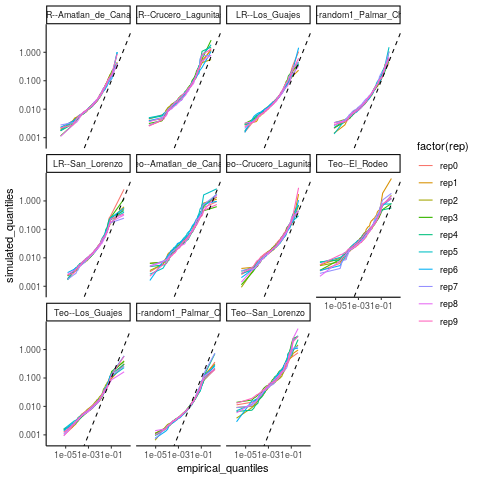

In [4]:
%%R
options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 200)


library(tidyverse)

poplist <-  c("LR--Amatlan_de_Canas",
            "LR--Crucero_Lagunitas",
            "LR--Los_Guajes",
            "LR--random1_Palmar_Chico",
            "LR--San_Lorenzo",
            "Teo--Amatlan_de_Canas",
            "Teo--Crucero_Lagunitas",
            "Teo--El_Rodeo",
            "Teo--Los_Guajes",
            "Teo--random1_Palmar_Chico",
            "Teo--San_Lorenzo"
            )


all_qdf <- 
poplist %>% map_df(function(cpop){
    
    suppressMessages(
    suppressWarnings(
    sim_df <- fs::dir_ls("../data/mushi/postsims/", glob = str_glue("*v5--{cpop}_ibdseq*hbd"))%>%
      map_df(~{
      vroom::vroom(.x,
          col_names = c("id1", "hidx1", "id2", "hidx2", "chrom", "start", "end", "lod")
      ) %>%
      mutate(file = str_remove_all(.x, "(../data/mushi/postsims/|_ibdseq.txt|.hbd)")) %>%
      mutate(type = "simulation") %>%
      separate(file, c("pop", "rep"), "_sim")
      }) %>%
      mutate(hbd_len = (1.6*(end - start))/1e6) %>%
      arrange(hbd_len) %>%
      mutate(hbd_sum = cumsum(hbd_len))
    ))

    hbd_df <- vroom::vroom("../data/ibdseq/hbd_df.csv")

    qs <- seq(0, 1, length.out = 100)

    sim_q <- 
    sim_df %>%
      group_by(rep) %>%
      group_modify(~{
          tibble(simulated_quantiles = quantile(.x$hbd_len, qs))
      }) %>%
      mutate(rep = paste0("rep", rep), id = 1:n(), type = "simulated")

    qs_df <- 
    hbd_df %>%
      filter(ssp_pop == cpop) %>%
      pull(hbd_lens) %>%
      quantile(qs, na.rm = TRUE) %>%
      tibble(empirical_quantiles = .) %>%
      mutate(id = 1:n()) %>%
      full_join(., sim_q, by = "id") %>%
      mutate(ssp_pop = cpop)
})

ggplot(all_qdf, aes(empirical_quantiles, simulated_quantiles, colour = factor(rep))) +
  geom_line() +
  geom_abline(aes(intercept = 0, slope = 1), lty = 2) +
  facet_wrap(~ ssp_pop) + 
  scale_y_log10() +
  scale_x_log10() +
  theme_classic()

                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
Columns: 11
Delimiter: ","
chr [4]: chr, ssp, pop, ssp_pop
dbl [7]: hbd_lens, hbd_sums, mean_ind, sd_ind, min_ind, max_ind, LOD

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

                                                                                                                   
                                                                                                                   
                                             

                                                                                                                   
                                                                                                                   
Columns: 11
Delimiter: ","
chr [4]: chr, ssp, pop, ssp_pop
dbl [7]: hbd_lens, hbd_sums, mean_ind, sd_ind, min_ind, max_ind, LOD

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                             

                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
Columns: 11
Delimiter: ","
chr [4]: chr, ssp, pop, ssp_pop
dbl [7]: hbd_lens, hbd_sums, mean_ind, sd_ind, min_ind, max_ind, LOD

Use `spec()` to retrieve the guessed column specification
P

                                                                                                                   
Columns: 11
Delimiter: ","
chr [4]: chr, ssp, pop, ssp_pop
dbl [7]: hbd_lens, hbd_sums, mean_ind, sd_ind, min_ind, max_ind, LOD

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                             

                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
Columns: 11
Delimiter: ","
chr [4]: chr, ssp, pop, ssp_pop
dbl [7]: hbd_lens, hbd_sums, mean_ind, sd_ind, min_ind, max_ind, LOD

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

                                                                                                                   
                                             

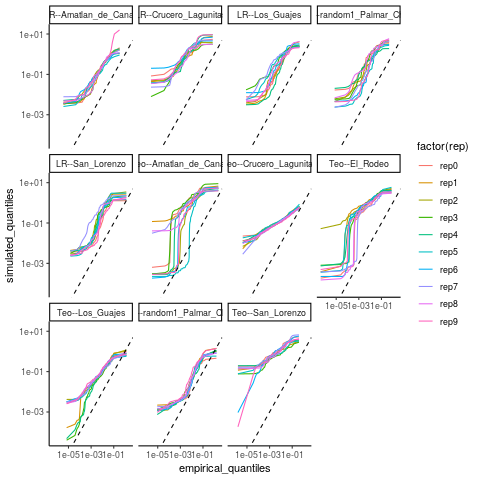

In [5]:
%%R
options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 200)


library(tidyverse)

poplist <-  c("LR--Amatlan_de_Canas",
            "LR--Crucero_Lagunitas",
            "LR--Los_Guajes",
            "LR--random1_Palmar_Chico",
            "LR--San_Lorenzo",
            "Teo--Amatlan_de_Canas",
            "Teo--Crucero_Lagunitas",
            "Teo--El_Rodeo",
            "Teo--Los_Guajes",
            "Teo--random1_Palmar_Chico",
            "Teo--San_Lorenzo"
            )


all_qdf <- 
poplist %>% map_df(function(cpop){
    
    suppressMessages(
    suppressWarnings(
    sim_df <- fs::dir_ls("../data/mushi/postsims/", glob = str_glue("*v5--{cpop}_DEFUALTREG*hbd"))%>%
      map_df(~{
      vroom::vroom(.x,
          col_names = c("id1", "hidx1", "id2", "hidx2", "chrom", "start", "end", "lod")
      ) %>%
      mutate(file = str_remove_all(.x, "(../data/mushi/postsims/|_ibdseq.txt|.hbd)")) %>%
      mutate(type = "simulation") %>%
      separate(file, c("pop", "rep"), "_sim")
      }) %>%
      mutate(hbd_len = (1.6*(end - start))/1e6) %>%
      arrange(hbd_len) %>%
      mutate(hbd_sum = cumsum(hbd_len))
    ))

    hbd_df <- vroom::vroom("../data/ibdseq/hbd_df.csv")

    qs <- seq(0, 1, length.out = 100)

    sim_q <- 
    sim_df %>%
      group_by(rep) %>%
      group_modify(~{
          tibble(simulated_quantiles = quantile(.x$hbd_len, qs))
      }) %>%
      mutate(rep = paste0("rep", rep), id = 1:n(), type = "simulated")

    qs_df <- 
    hbd_df %>%
      filter(ssp_pop == cpop) %>%
      pull(hbd_lens) %>%
      quantile(qs, na.rm = TRUE) %>%
      tibble(empirical_quantiles = .) %>%
      mutate(id = 1:n()) %>%
      full_join(., sim_q, by = "id") %>%
      mutate(ssp_pop = cpop)
})

ggplot(all_qdf, aes(empirical_quantiles, simulated_quantiles, colour = factor(rep))) +
  geom_line() +
  geom_abline(aes(intercept = 0, slope = 1), lty = 2) +
  facet_wrap(~ ssp_pop) + 
  scale_y_log10() +
  scale_x_log10() +
  theme_classic()

In [9]:
["fart1".replace("1", str(i)) for i in list(range(10))]

['fart0',
 'fart1',
 'fart2',
 'fart3',
 'fart4',
 'fart5',
 'fart6',
 'fart7',
 'fart8',
 'fart9']